# Feature Selection with Mutual information Scores

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
s = df.isna().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Seperate X and Y

In [7]:
X = df.drop(columns=['PassengerId','Name','Ticket','Survived'])
Y = df[['Survived']]

In [8]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


## Seperate Cat and con features

In [9]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['Sex', 'Cabin', 'Embarked']

In [11]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Create a simple Sklearn pipeline for Feature Selection
1. Ordinal Encoding - Categorical Features

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
# Numeric pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical Pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ordinal',OrdinalEncoder())])

# Combine cat and con pipelines
pre1 = ColumnTransformer([('num',num_pipe, con),
                          ('cat',cat_pipe, cat)])

In [14]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 8.27377244e-01, -5.65736461e-01,  4.32793366e-01, ...,
         1.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00,  6.63861032e-01,  4.32793366e-01, ...,
         0.00000000e+00,  8.10000000e+01,  0.00000000e+00],
       [ 8.27377244e-01, -2.58337088e-01, -4.74545196e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       ...,
       [ 8.27377244e-01, -1.04637401e-01,  4.32793366e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00, -2.58337088e-01, -4.74545196e-01, ...,
         1.00000000e+00,  6.00000000e+01,  0.00000000e+00],
       [ 8.27377244e-01,  2.02761972e-01, -4.74545196e-01, ...,
         1.00000000e+00,  1.47000000e+02,  1.00000000e+00]])

In [15]:
cols = pre1.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex', 'cat__Cabin', 'cat__Embarked'], dtype=object)

In [16]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex,cat__Cabin,cat__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,147.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,81.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,147.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,55.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,147.0,2.0


### Calculating Mutual Information Scores

In [17]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.06790608, 0.01082947, 0.02299281, 0.00809121, 0.13692642,
       0.17129371, 0.04723748, 0.        ])

In [18]:
mi = pd.Series(mi)
mi.index = cols
mi = mi.sort_values(ascending=False)
mi

cat__Sex         0.171294
num__Fare        0.136926
num__Pclass      0.067906
cat__Cabin       0.047237
num__SibSp       0.022993
num__Age         0.010829
num__Parch       0.008091
cat__Embarked    0.000000
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

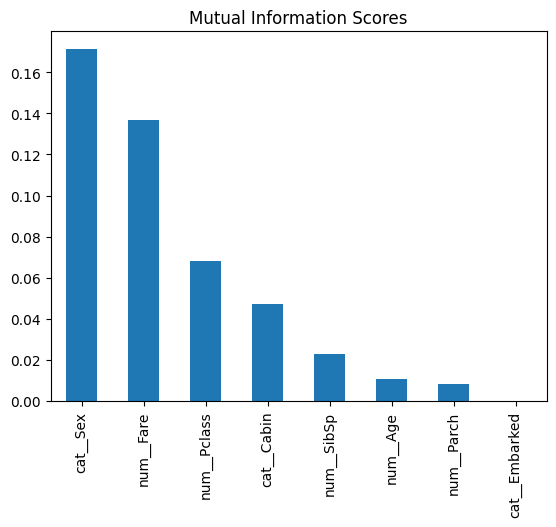

In [19]:
mi.plot(kind='bar',title='Mutual Information Scores')

In [20]:
sel_cols = list(mi[0:6].index)
sel_cols

['cat__Sex',
 'num__Fare',
 'num__Pclass',
 'cat__Cabin',
 'num__SibSp',
 'num__Age']

In [21]:
# Approach 2 Select top n features
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(mutual_info_classif,k=6)
sel_features = sel.fit_transform(X_pre, Y)

In [22]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Pclass', 'num__Age', 'num__Parch', 'num__Fare', 'cat__Sex',
       'cat__Cabin'], dtype=object)

In [23]:
sel_cols[0].split('__')[1]

'Pclass'

In [24]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [25]:
imp_cols

['Pclass', 'Age', 'Parch', 'Fare', 'Sex', 'Cabin']

In [26]:
X_sel = X[imp_cols]

In [27]:
X_sel

,Pclass,Age,Parch,Fare,Sex,Cabin
0,3,22.0,0,7.2500,male,NaN
1,1,38.0,0,71.2833,female,C85
2,3,26.0,0,7.9250,female,NaN
3,1,35.0,0,53.1000,female,C123
4,3,35.0,0,8.0500,male,NaN
...,...,...,...,...,...,...
886,2,27.0,0,13.0000,male,NaN
887,1,19.0,0,30.0000,female,B42
888,3,NaN,2,23.4500,female,NaN
889,1,26.0,0,30.0000,male,C148


In [28]:
## Cat , con for Selected features
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [29]:
cat_sel

['Sex', 'Cabin']

In [30]:
con_sel

['Pclass', 'Age', 'Parch', 'Fare']

### Create a final Pipeline

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num',num_pipe2, con_sel),
                          ('cat',cat_pipe2, cat_sel)])

In [33]:
X_sel_pre = pre2.fit_transform(X_sel).toarray()
X_sel_pre

array([[ 0.82737724, -0.56573646, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.47367361, ...,  0.        ,
         0.        ,  1.        ]])

In [34]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Pclass', 'num__Age', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Cabin_A10',
       'cat__Cabin_A14', 'cat__Cabin_A16', 'cat__Cabin_A19',
       'cat__Cabin_A20', 'cat__Cabin_A23', 'cat__Cabin_A24',
       'cat__Cabin_A26', 'cat__Cabin_A31', 'cat__Cabin_A32',
       'cat__Cabin_A34', 'cat__Cabin_A36', 'cat__Cabin_A5',
       'cat__Cabin_A6', 'cat__Cabin_A7', 'cat__Cabin_B101',
       'cat__Cabin_B102', 'cat__Cabin_B18', 'cat__Cabin_B19',
       'cat__Cabin_B20', 'cat__Cabin_B22', 'cat__Cabin_B28',
       'cat__Cabin_B3', 'cat__Cabin_B30', 'cat__Cabin_B35',
       'cat__Cabin_B37', 'cat__Cabin_B38', 'cat__Cabin_B39',
       'cat__Cabin_B4', 'cat__Cabin_B41', 'cat__Cabin_B42',
       'cat__Cabin_B49', 'cat__Cabin_B5', 'cat__Cabin_B50',
       'cat__Cabin_B51 B53 B55', 'cat__Cabin_B57 B59 B63 B66',
       'cat__Cabin_B58 B60', 'cat__Cabin_B69', 'cat__Cabin_B71',
       'cat__Cabin_B73', 'cat__Cabin_B77', 'cat__Cabin_B78',
       'cat__Cabin_B79

In [35]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre.head()

,num__Pclass,num__Age,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,...,cat__Cabin_F E69,cat__Cabin_F G63,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown
0,0.827377,-0.565736,-0.473674,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.663861,-0.473674,0.786845,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.827377,-0.258337,-0.473674,-0.488854,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,-0.473674,0.420730,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.827377,0.433312,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

### Create a final model on Gradient Boost classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=21)
gbc.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=21)

In [38]:
# Check accuracy in training
gbc.score(xtrain, ytrain)

0.8862359550561798

In [39]:
# Check accuracy in testing
gbc.score(xtest, ytest)

0.8100558659217877

### Perform Hyperparameter tuning
1. GridSearchCV (Slower)
2. RandomizedSearchCV (Faster)

In [40]:
params = {'learning_rate':[0.01, 0.05, 0.1, 0.2],
          'max_depth':[2,3,4,5,6,7,8],
          'min_samples_split':[2,3,4,5,6,7,8,9,10]}

In [41]:
from sklearn.model_selection import RandomizedSearchCV
base_gbc = GradientBoostingClassifier(random_state=21)
rscv = RandomizedSearchCV(base_gbc, param_distributions=params, cv=5, scoring='f1',random_state=21)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=21),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   random_state=21, scoring='f1')

In [42]:
rscv.best_params_

{'min_samples_split': 4, 'max_depth': 6, 'learning_rate': 0.1}

In [43]:
rscv.best_score_

0.7564331169959101

In [44]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(max_depth=6, min_samples_split=4, random_state=21)

### Evaluate the model

In [45]:
best_gbc.score(xtrain, ytrain)

0.9367977528089888

In [46]:
best_gbc.score(xtest, ytest)

0.8100558659217877

### Predict train and test data

In [47]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [48]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [49]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [50]:
ypred_ts[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [51]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


### Confusion Matrix

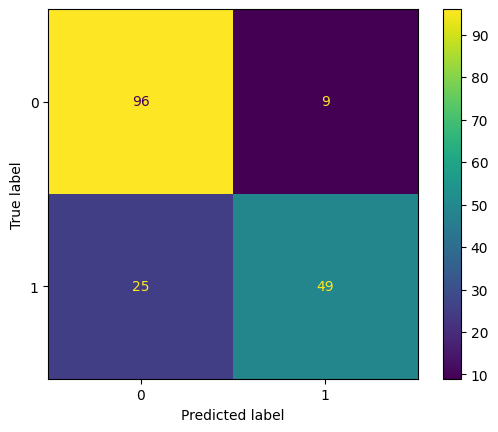

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_gbc.classes_)
cfd.plot()

### Classification Report

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.84      0.66      0.74        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



### Selected the model for final predictions
### Perform predictions on test_titanic.csv

In [54]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [56]:
xnew.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [57]:
xnew_pre = pre2.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724,  0.39488658, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  1.35550962, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.50825727, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 ,  0.76762988, ...,  0.        ,
         0.        ,  1.        ]])

In [58]:
xnew_pre = pd.DataFrame(xnew_pre, columns=final_cols)
xnew_pre

,num__Pclass,num__Age,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,...,cat__Cabin_F E69,cat__Cabin_F G63,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown
0,0.827377,0.394887,-0.473674,-0.490783,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.827377,1.355510,-0.473674,-0.507479,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.473674,-0.453367,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.827377,-0.181487,-0.473674,-0.474005,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.767630,-0.401017,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.827377,-0.104637,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,-1.566107,0.740711,-0.473674,1.544246,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.827377,0.702286,-0.473674,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.827377,-0.104637,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Perform predictions

In [59]:
pred = best_gbc.predict(xnew_pre)
pred[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [60]:
prob = best_gbc.predict_proba(xnew_pre)[:,1]
prob

array([0.10396656, 0.39560863, 0.2379419 , 0.29489335, 0.71098018,
       0.08733674, 0.52967178, 0.15786112, 0.94667732, 0.10225411,
       0.09283513, 0.05683322, 0.96650915, 0.1114143 , 0.96261622,
       0.95571791, 0.08780082, 0.29655384, 0.76821968, 0.61169846,
       0.13862308, 0.5896916 , 0.96441371, 0.06466725, 0.98477813,
       0.06134766, 0.96659165, 0.29655384, 0.28210299, 0.10406892,
       0.06134766, 0.10552696, 0.81179446, 0.07057946, 0.3736304 ,
       0.28035509, 0.25826336, 0.19964261, 0.09513059, 0.4022051 ,
       0.08050704, 0.26488109, 0.13478197, 0.95185047, 0.97785647,
       0.1417626 , 0.17118134, 0.12743706, 0.97441583, 0.82070507,
       0.19112251, 0.18221965, 0.96292156, 0.96794102, 0.10406892,
       0.07546269, 0.08401546, 0.09167354, 0.10406892, 0.96834299,
       0.09670978, 0.12881985, 0.1285125 , 0.81731281, 0.19141096,
       0.89936909, 0.50998099, 0.04101506, 0.28076888, 0.97019723,
       0.53508318, 0.09657351, 0.70059314, 0.26488109, 0.96834

### Save this values in dataframe

In [61]:
df_results = xnew[['PassengerId']]
df_results

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [62]:
df_results['Survived']=pred
df_results['Probability']=prob

In [63]:
df_results

,PassengerId,Survived,Probability
0,892,0,0.103967
1,893,0,0.395609
2,894,0,0.237942
3,895,0,0.294893
4,896,1,0.710980
...,...,...,...
413,1305,0,0.095326
414,1306,1,0.968343
415,1307,0,0.062427
416,1308,0,0.095326


In [64]:
df_results['Survived'].value_counts()

Survived
0    283
1    135
Name: count, dtype: int64

<Axes: xlabel='Survived'>

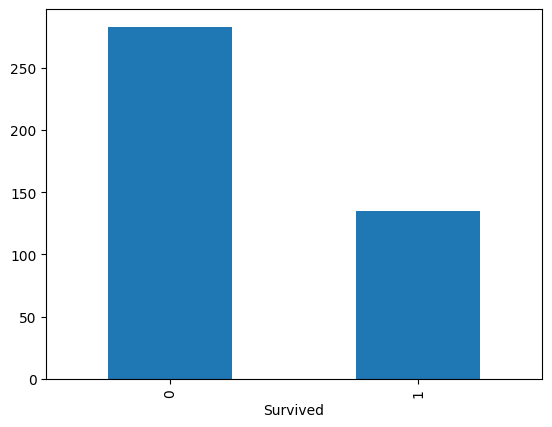

In [65]:
df_results['Survived'].value_counts().plot(kind='bar')

In [66]:
df_results.to_csv('Result.csv',index=False)